# EDA

In [1]:
# Dependencies
import pandas as pd

In [2]:
# Baca File

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Statistika Deskriptif
print("--- Statistika Deskriptif ---")
print(df.describe(),'\n')

# Cek tipe data tiap kolom
print("--- Tipe Data ---")
print(df.dtypes,"\n")

# Cek null pada tiap2 kolom

print("--- Cek missing value ---")
print(df.isnull().sum(),"\n")

--- Statistika Deskriptif ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   

--- Tipe Data ---
PassengerId      int64
Survived

In [51]:
# Cek Data Age yang hilang

print(df[df['Age'].notnull()]['Survived'].value_counts(normalize=True))
print(df[df['Age'].isnull()]['Survived'].value_counts(normalize=True))

# Cek Data Cabin yang hilang

print(df[df['Cabin'].notnull()]['Survived'].value_counts())
print(df[df['Cabin'].isnull()]['Survived'].value_counts())

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)


KeyError: 'Cabin'

In [37]:
def preprocess(data):

    # Membuat flag untuk kolom yang akan diubah untuk tetap menajga informasi dari kolom tersebut

    data['Cabin_missing'] = data['Cabin'].isnull().astype(int)
    data['Age_missing'] = data['Age'].isnull().astype(int)

    # Drop kolom Cabin

    data.drop(columns='Cabin', inplace=True)

    # Mengisi missing value pada Age dengan median nya

    median_age = data['Age'].median()

    data['Age'] = data['Age'].fillna(median_age)

    # Drop baris NaN di Embarked

    data = data[data['Embarked'].notnull()]

    # Encoding Sex

    data['Sex_encoded'] = data['Sex'].map({'female' : 1, 'male': 0})

    return data

In [38]:
df=preprocess(df)
df

C:\Users\falih\AppData\Local\Temp\ipykernel_8820\1274421456.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex_encoded'] = data['Sex'].map({'female' : 1, 'male': 0})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_missing,Age_missing,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,1,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,0


## Visualisasi

In [15]:
# Dependencies

import seaborn as sns
import matplotlib.pyplot as plt

# Gatau ini apa tapi katanya biar plot nya lebih oke
sns.set(style="whitegrid")

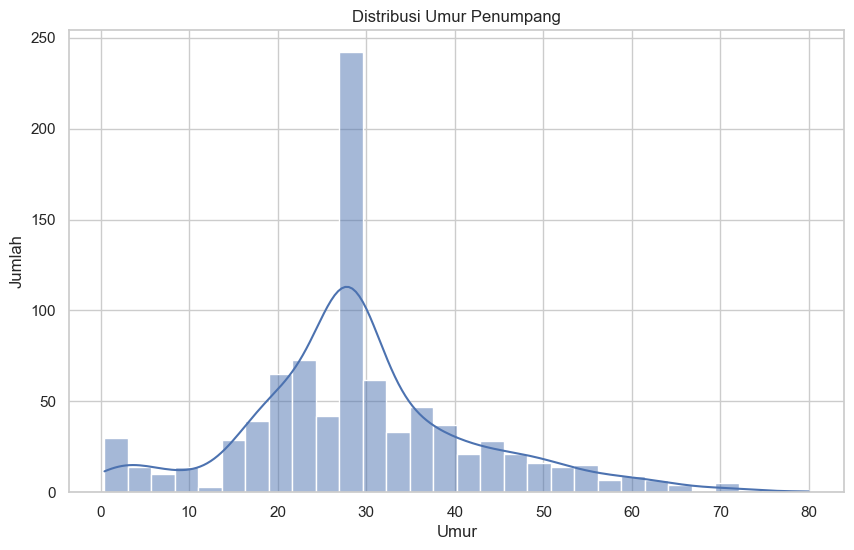

In [16]:
# Age

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribusi Umur Penumpang")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

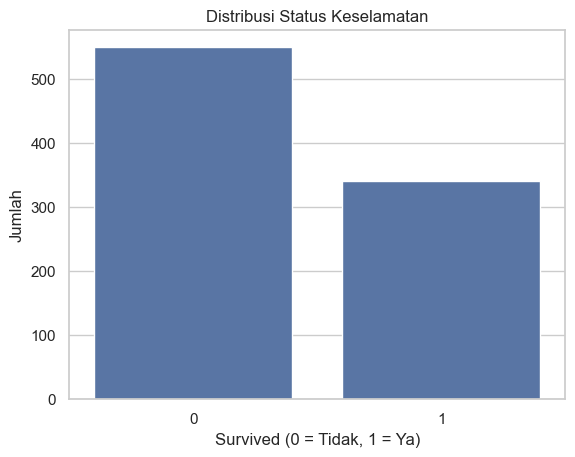

In [17]:
# Survived

sns.countplot(data=df, x='Survived')
plt.title("Distribusi Status Keselamatan")
plt.xlabel("Survived (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

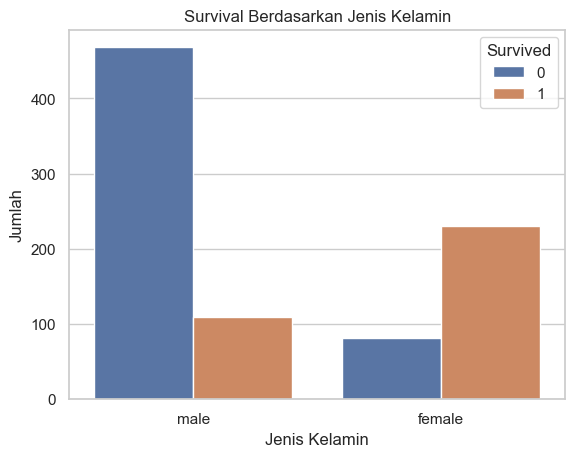

In [18]:
# Survival berdasarkan jenis kelamin

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.legend(title='Survived')
plt.show()

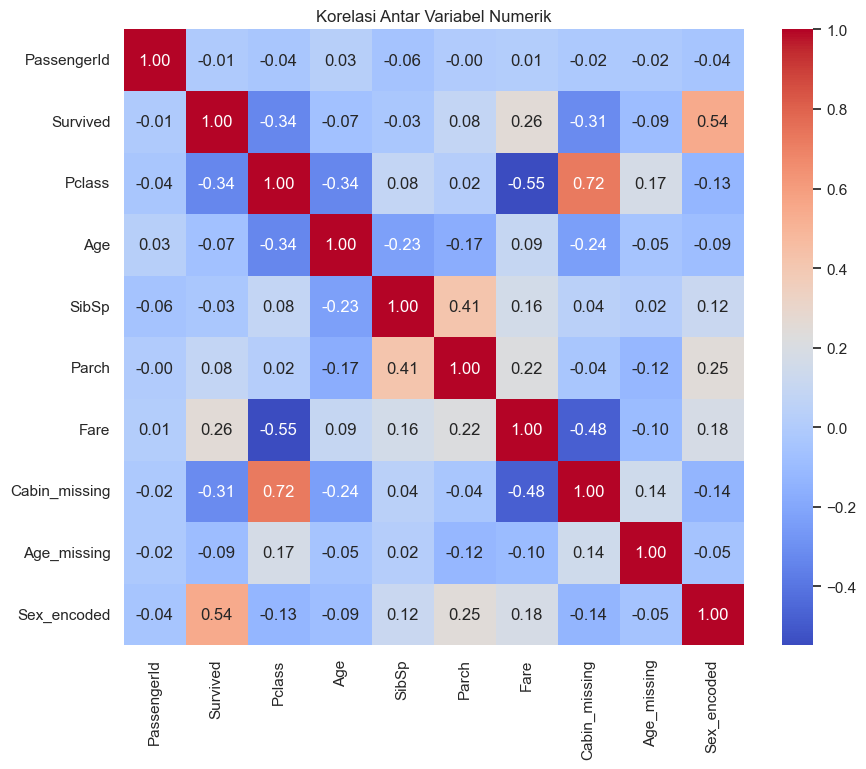

In [19]:
# Korelasi antar fitur

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

In [20]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

# Modeling

In [40]:
# Dependencies

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Pilih fitur yang mau digunakan untuk modeling

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_missing', 'Age_missing', 'Sex_encoded']

X = df[features]
y = df['Survived']

In [42]:
# Splitting data Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

In [25]:
# Bikin model nya
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Coba Evaluasi Hasil

y_pred = model_decision_tree.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nReport:")
print(classification_report(y_test, y_pred))

Akurasi: 0.7584269662921348

Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       109
           1       0.66      0.77      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



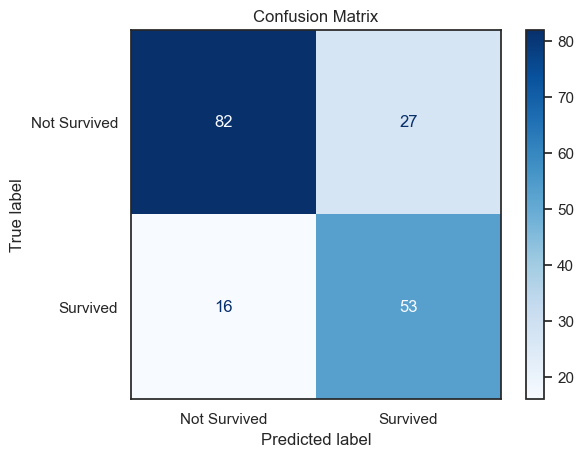

In [27]:
# Coba tampilin confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style("white")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

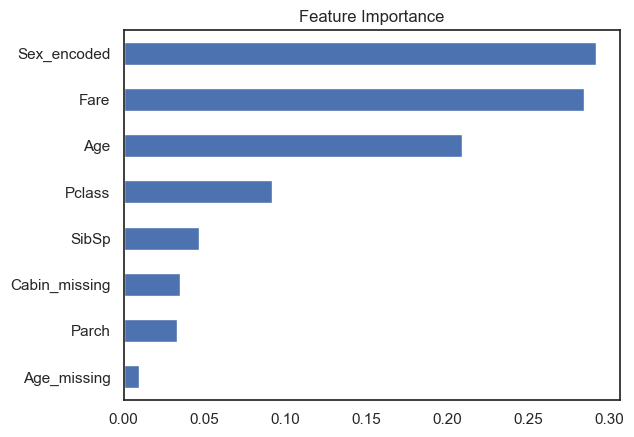

In [28]:
# Cek Importance Features

importance = pd.Series(model_decision_tree.feature_importances_, index=features)
importance.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [29]:
# Nampilin Tree nya
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], 
          filled=True, rounded=True, fontsize=10)
plt.show()

NameError: name 'model' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Nampilin tree pakai text
from sklearn.tree import export_text

print(export_text(model, feature_names=features))

### Random Forest

In [43]:
# Bikin model Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [45]:
y_pred = rf.predict(X_test)

# print(confusion_matrix(y_test, y_pred))

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nReport : \n")
print(classification_report(y_test, y_pred))

Akurasi: 0.8089887640449438

Report : 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.77      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



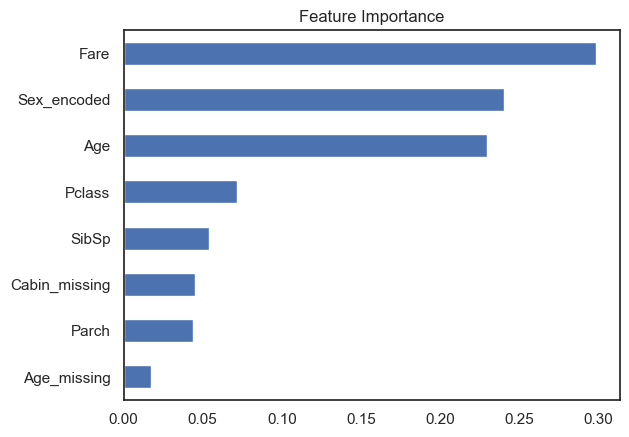

In [ ]:
# Cek Importance Features

importance = pd.Series(rf.feature_importances_, index=features)
importance.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

## Prediction

In [53]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
# Praproses data test

df_test = preprocess(df_test)

In [58]:
# Predict
test_prediction = rf.predict(df_test[features])

In [59]:
outputs = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : test_prediction
})

In [60]:
outputs

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
outputs.to_csv('submission.csv', index=False)